In [1]:
# importing parkages
import numpy as np
import pandas as pd
import re
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# Import Scikit-learn helper functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Import Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Import Scikit-learn metric functions
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

In [3]:
df = pd.read_csv("URL Classification.csv")
# shuflling the dataset to have all the classes captured on the group column since my machine cannot train the volumn
# shuffle the DataFrame rows
df = df.sample(frac = 1)

data = df.iloc[: , :]
data.head()

,1,http://www.liquidgeneration.com/,Adult
1336269,1336271,http://www.jlcolumbia.org/,Society
66816,66818,http://www.cinematiks.com/,Arts
631124,631126,http://kiltdown.sourceforge.net/index.html,Computers
1288844,1288846,http://www.cf-law.com/,Society
157429,157431,http://www.angelfire.com/music2/oasisvip/,Arts


In [4]:
def arrange_data(data):
    data.drop('1', axis = 1,inplace = True)
    data.reset_index(drop = True, inplace = True)
    data.columns = ['url', 'group']
    return data.head()
arrange_data(data)

,url,group
0,http://www.jlcolumbia.org/,Society
1,http://www.cinematiks.com/,Arts
2,http://kiltdown.sourceforge.net/index.html,Computers
3,http://www.cf-law.com/,Society
4,http://www.angelfire.com/music2/oasisvip/,Arts


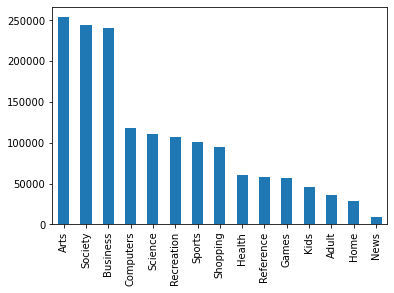

In [5]:
data.group.value_counts().plot(kind = "bar");

In [6]:
# x = {'Arts': 1, 'Society': 2, 'Business': 3, 'Computers': 4, 'Science': 5, 'Recreation': 6, 'Sports': 7, 'Shopping': 8, 'Health': 9, 'Reference': 10, 'Games': 11, 'Kids': 12, 'Adult': 13, 'Home': 14, 'News': 15}
# data['group'] = data['group'].map(x)
# data.group.value_counts().plot(kind = "bar");

In [7]:
data.head()

,url,group
0,http://www.jlcolumbia.org/,Society
1,http://www.cinematiks.com/,Arts
2,http://kiltdown.sourceforge.net/index.html,Computers
3,http://www.cf-law.com/,Society
4,http://www.angelfire.com/music2/oasisvip/,Arts


In [8]:
data.shape

(1562977, 2)

In [9]:
data.isnull().sum()

url      3
group    0
dtype: int64

In [10]:
data.dropna(inplace = True)

In [11]:
data.isnull().sum()

url      0
group    0
dtype: int64

In [12]:
data.group.value_counts()

Arts          253840
Society       243942
Business      240176
Computers     117961
Science       110286
Recreation    106586
Sports        101328
Shopping       95270
Health         60097
Reference      58247
Games          56477
Kids           46182
Adult          35324
Home           28269
News            8989
Name: group, dtype: int64

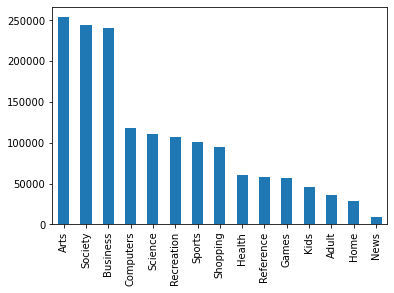

In [13]:
data.group.value_counts().plot(kind = "bar");

In [14]:
data.group.unique()

array(['Society', 'Arts', 'Computers', 'Reference', 'Business', 'Health',
       'Sports', 'Science', 'Kids', 'Recreation', 'Shopping', 'Adult',
       'Home', 'Games', 'News'], dtype=object)

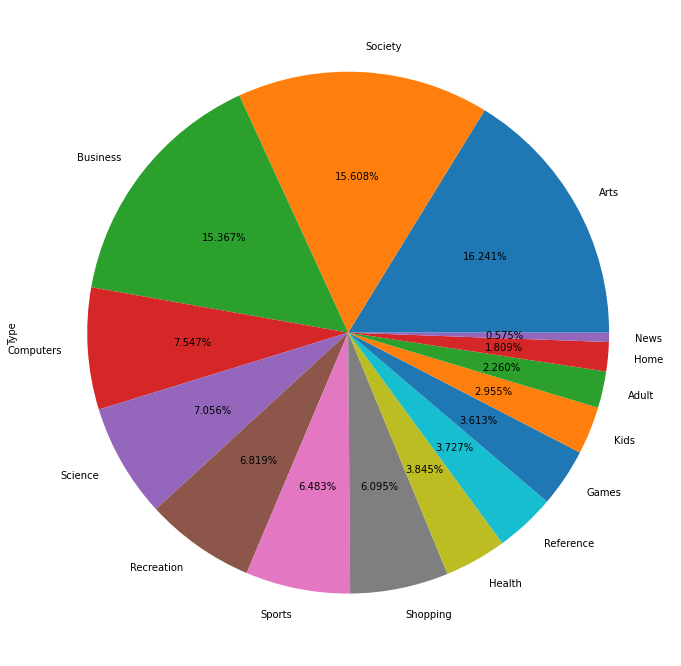

In [15]:
data.group.value_counts().plot(kind = "pie",figsize = (12,12),y = "url",
                                       label = "Type",
                                       autopct='%1.3f%%');

In [16]:
data = data.sample(frac = 1)
data = data.reset_index(drop = True)
data.head()

,url,group
0,http://roots.iai.uni-bonn.de/research/jmangler/,Computers
1,http://www.macmhb.org/subabuse02/satp.htm,Health
2,http://www.merz-sw.com/,Business
3,http://www.wslha.org/,Society
4,http://www.computerandvideogames.com/news/news...,Games


## Splitting the dataset

In [17]:
# train_df, test_df = train_test_split(data, test_size = 0.3, random_state = 42)

# labels = train_df['group']
# test_labels = test_df['group']

In [18]:
data.shape

(1562974, 2)

In [19]:
# def makeTokens(f):
#   # make tokens after splitting by slash
#     tkns_BySlash = str(f.encode('utf-8')).split('/')	
#     total_Tokens = []
#     for i in tkns_BySlash:
#       # make tokens after splitting by dash
#         tokens = str(i).split('-')
#         tkns_ByDot = []
#         for j in range(0,len(tokens)):
#           # make tokens after splitting by dot
#             temp_Tokens = str(tokens[j]).split('.')	
#             tkns_ByDot = tkns_ByDot + temp_Tokens
#         total_Tokens = total_Tokens + tokens + tkns_ByDot
#         #remove redundant tokens
#     total_Tokens = list(set(total_Tokens))	
#     if 'com' in total_Tokens:
#       #removing .com since it occurs a lot of times and it should not be included in our features
#         total_Tokens.remove('com')	
#     return total_Tokens

## testing our tokenizer function


In [20]:
# #using the 8th url on our dataset to test our tokenizer function
# tokenized = makeTokens(data["url"][8])
# print("ORIGINAL URL: \n\n", data["url"][8])
# print("\nTOKENIZED URL: \n\n", tokenized)

In [21]:
# #     1. Count vectorizer
# #     2. Term Frequency-Inverse Document Frequency (TF-IDF)

# print("- Training Count Vectorizer -")
# cVec = CountVectorizer()
# count_X = cVec.fit_transform(data['url'].values)

# print("- Training TF-IDF Vectorizer -")
# tVec = TfidfVectorizer(tokenizer=makeTokens)
# tfidf_X = tVec.fit_transform(data['url'])


# print("\n### Vectorizing Complete ###\n")

# Building Our Base Model
- PIPELINE

In [22]:
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import cross_validate

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=42)
# pipe_nb = make_pipeline(
#     CountVectorizer(),
#     MultinomialNB()
# )
# scores = cross_validate(pipe_nb, X_train, y_train, return_train_score=True)
# scores = pd.DataFrame(scores)

In [23]:
# scores.mean()

# Tokenization using regexTokenizer
Create our tokenizer by splitting URLs into their domains, subdomains, directories, files, and extensions.

#### RegexpTokenizer
A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [24]:
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text 
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [25]:
data.shape

(1562974, 2)

In [26]:
data.url[0]

'http://roots.iai.uni-bonn.de/research/jmangler/'

In [27]:
# this will be pull letter which matches to expression
# tokenizer.tokenize(data.url[90000]) 


# using first row

data = data.loc[:156297, :]
data.url.nunique()

155836

In [28]:
# print('Getting words tokenized ...')
# t0= time.perf_counter()
data['text_tokenized'] = data.url.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
# t1 = time.perf_counter() - t0
# print('Time taken',t1 ,'sec')

In [29]:
data.tail(20)

,url,group,text_tokenized
156278,http://www.affordablehousingsc.org,Business,"[http, www, affordablehousingsc, org]"
156279,http://oralsexshot.com/09/cyberage/,Adult,"[http, oralsexshot, com, cyberage]"
156280,http://www.gpdemolay.org/,Kids,"[http, www, gpdemolay, org]"
156281,http://www.essexskatingclub.org/skaters/skater...,Sports,"[http, www, essexskatingclub, org, skaters, sk..."
156282,http://www.sullivanhomeplans.com,Business,"[http, www, sullivanhomeplans, com]"
156283,http://www.cwnews.com/,Society,"[http, www, cwnews, com]"
156284,http://www.meadowtreasures.com/,Shopping,"[http, www, meadowtreasures, com]"
156285,http://www.marineac.com,Business,"[http, www, marineac, com]"
156286,http://www.octanecreative.com/ducttape/,Recreation,"[http, www, octanecreative, com, ducttape]"
156287,http://www.stevenwbush.com,Arts,"[http, www, stevenwbush, com]"


## SnowballStemmer
Snowball is a small string processing language, gives root words


In [30]:
from nltk.stem.snowball import SnowballStemmer # stemmes words
stemmer = SnowballStemmer("english") # choose a language


data['text_stemmed'] = data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

data['text_sent'] = data['text_stemmed'].map(lambda l: ' '.join(l))



In [31]:
data.head()

,url,group,text_tokenized,text_stemmed,text_sent
0,http://roots.iai.uni-bonn.de/research/jmangler/,Computers,"[http, roots, iai, uni, bonn, de, research, jm...","[http, root, iai, uni, bonn, de, research, jma...",http root iai uni bonn de research jmangler
1,http://www.macmhb.org/subabuse02/satp.htm,Health,"[http, www, macmhb, org, subabuse, satp, htm]","[http, www, macmhb, org, subabus, satp, htm]",http www macmhb org subabus satp htm
2,http://www.merz-sw.com/,Business,"[http, www, merz, sw, com]","[http, www, merz, sw, com]",http www merz sw com
3,http://www.wslha.org/,Society,"[http, www, wslha, org]","[http, www, wslha, org]",http www wslha org
4,http://www.computerandvideogames.com/news/news...,Games,"[http, www, computerandvideogames, com, news, ...","[http, www, computerandvideogam, com, news, ne...",http www computerandvideogam com news news sto...


### CREATING/PLOTING A WORDCLOUD

- plota a wordcloud to see the most used word for each of the following class of urls

In [32]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

## The above chart shows that the data is unbalanced, so we need to balance it
- but first we needed to change the url parameters to integers so imblearn can sample
- then we now use SMOTE from over_sampling in imbllearn to sample the set
- then confirm if our dataset is now balanced as expectd

In [33]:
#create count_vectorizer and "TFIDF_term friquency inverse document frequency vectorizer" object
# cv = CountVectorizer()
cv = TfidfVectorizer()
#help(CountVectorizer())
feature = cv.fit_transform(data.text_sent) #

In [34]:
#confirming if our text has been vectorised
feature[10:15].toarray() 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
#import imblearn to balance the classes
import imblearn
from imblearn.over_sampling import SMOTE
from numpy import where
from collections import Counter
X = feature
y = data['group']
counter = Counter(y)
print("##---THE UNSAMPLED DATASET----##\n\n")
print(counter)

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)
counter = Counter(y)
print("\n\n##---THE UNSAMPLED DATASET----##\n\n")
print(counter)

##---THE UNSAMPLED DATASET----##


Counter({'Arts': 25410, 'Society': 24170, 'Business': 23975, 'Computers': 11858, 'Science': 11082, 'Recreation': 10755, 'Sports': 10169, 'Shopping': 9548, 'Health': 6094, 'Reference': 5804, 'Games': 5612, 'Kids': 4678, 'Adult': 3492, 'Home': 2780, 'News': 871})


##---THE UNSAMPLED DATASET----##


Counter({'Computers': 25410, 'Health': 25410, 'Business': 25410, 'Society': 25410, 'Games': 25410, 'Sports': 25410, 'Arts': 25410, 'Recreation': 25410, 'Kids': 25410, 'Adult': 25410, 'Home': 25410, 'Shopping': 25410, 'Reference': 25410, 'Science': 25410, 'News': 25410})


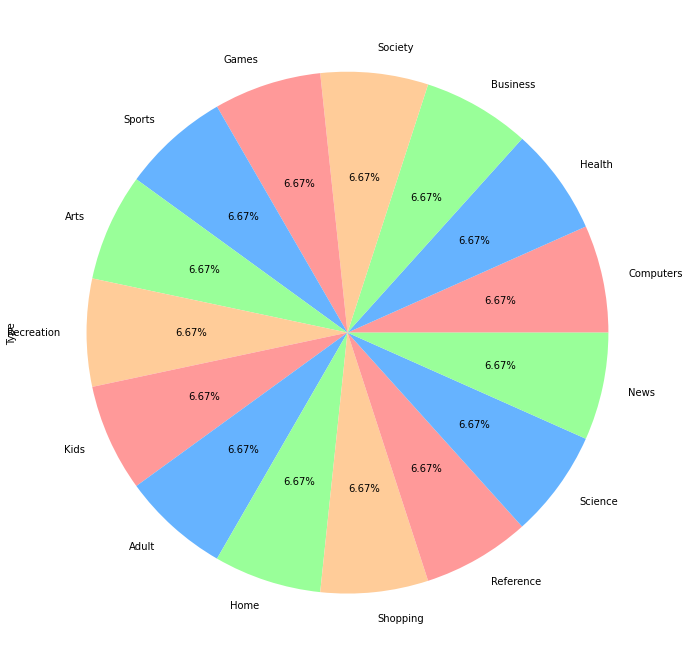

In [44]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
y.value_counts().plot(kind = "pie",figsize = (12,12),y = "url",
                                       label = "Type",
                                       autopct='%1.2f%%', colors = colors);

now our dataset is balanced , and we can now continue building the base model

## Spliting the Dataset to Train and Test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

 ## Using Multinomial Naive Bayesian with TF-IDF

In [38]:
# Train the model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)


# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb = mnb.score(X_train, y_train)
predictions_mnb = mnb.predict(X_test)
cmatrix_mnb_tfidf = confusion_matrix(y_test, predictions_mnb)
creport_mnb_tfidf = classification_report(y_test, predictions_mnb)

print(score_mnb,"\n\n### Model Built ###\n")
print(classification_report(y_test, predictions_mnb))

0.8713170667716122 

### Model Built ###

              precision    recall  f1-score   support

       Adult       0.88      0.95      0.91      5176
        Arts       0.74      0.34      0.46      5223
    Business       0.80      0.09      0.16      5120
   Computers       0.75      0.64      0.69      5061
       Games       0.77      0.92      0.83      4995
      Health       0.68      0.91      0.78      5054
        Home       0.88      0.96      0.92      5093
        Kids       0.79      0.78      0.78      5068
        News       0.91      1.00      0.95      5036
  Recreation       0.69      0.66      0.67      5133
   Reference       0.75      0.88      0.81      5063
     Science       0.76      0.71      0.73      5063
    Shopping       0.36      0.90      0.52      5054
     Society       0.76      0.24      0.36      5041
      Sports       0.80      0.78      0.79      5050

    accuracy                           0.71     76230
   macro avg       0.75      0.72     

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

hyper = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
         'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
         'kernel':['rbf','linear']
        }

gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


## USING LOGISTIC REGRESSION

In [39]:
# create lr object
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [40]:
print(lr.score(X_train,y_train),"<--: lr training score")
predictions_lgs_tfidf = lr.predict(X_test)
cmatrix_lgs_tfidf = confusion_matrix(predictions_lgs_tfidf, y_test)
creport_lgs_tfidf = classification_report(predictions_lgs_tfidf, y_test)

0.6902105470287289 <--: lr training score


In [41]:
print(creport_lgs_tfidf)

              precision    recall  f1-score   support

       Adult       0.81      0.89      0.85      4692
        Arts       0.44      0.44      0.44      5308
    Business       0.70      0.29      0.41     12119
   Computers       0.45      0.57      0.50      4003
       Games       0.74      0.79      0.77      4683
      Health       0.71      0.76      0.73      4772
        Home       0.88      0.89      0.89      5028
        Kids       0.66      0.73      0.69      4547
        News       0.96      0.95      0.96      5041
  Recreation       0.37      0.59      0.46      3224
   Reference       0.75      0.70      0.73      5453
     Science       0.57      0.69      0.62      4133
    Shopping       0.58      0.55      0.56      5307
     Society       0.42      0.44      0.43      4800
      Sports       0.54      0.88      0.67      3120

    accuracy                           0.64     76230
   macro avg       0.64      0.68      0.65     76230
weighted avg       0.65   